In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from cdlib import algorithms, evaluation, viz, ensemble
from cdlib.classes import NodeClustering
import seaborn as sns

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'bayanpy', 'leidenalg', 'infomap'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'infomap'}


In [2]:
# Importing data

DG = nx.read_gexf('../data_collection/data/network_connected.gexf')

# Comparing CD with categories

In [3]:
# Importing dataset

df = pd.read_csv('../data_collection/data/dataset_sentiment.csv', 
                 converters={"Links": lambda x: x.strip("[]").replace("'","").split(", ")}) # from str to list
df = df[['Page', 'Category', 'Links', 'Text', 'Score']]

df.head()

,Page,Category,Links,Text,Score
0,Field trip,Education,[American Association of School Administrators...,['A field trip or excursion is a journey by a ...,0.9837
1,Education in emergencies and conflict areas,Education,"[Adult, Armed conflict, Asylum seeker, Banglad...","[""Education in emergencies and conflict areas ...",-0.9356
2,Ability grouping,Education,"[Academic achievement, Classroom, Cluster grou...",['Ability grouping is the educational practice...,0.9931
3,Classwide Peer Tutoring,Education,"[ADHD, Active learning, Cardio-pulmonary resus...",['Classwide Peer Tutoring (CWPT) is a variatio...,0.9960
4,Flexible learning,Education,"[Australia, Blended learning, Distance educati...",['Flexible learning is a principle of practice...,0.7579


In [4]:
# Converting to undirected graph 

G = nx.DiGraph.to_undirected(DG)

In [5]:
# Evaluation function

def eval_cd(graph,comms): # comms = communites resulting from cd algorithm
    print('Overlapping: ', comms.overlap)
    print('Node coverage: ', comms.node_coverage)
    print()
    # Internal evaluation
    print('Internal edge density: ', evaluation.internal_edge_density(graph,comms))
    print('Average node degree: ', evaluation.average_internal_degree(graph,comms))
    print('Modularity: ', evaluation.erdos_renyi_modularity(graph,comms))
    print('Conductance: ', evaluation.conductance(graph,comms))
    print()
    # Printing sizes
    print('Number of communities: ', len(comms.communities))
    print('Largest community size: ', len(comms.communities[0]))
    print('Second largest community: ', len(comms.communities[1]))
    print('Third community: ', len(comms.communities[2]))

In [6]:
# Getting communities

# Directed
info = algorithms.infomap(DG)

em = algorithms.em(DG, k=15)


# Undirected
louvain = algorithms.louvain(G)
label = algorithms.label_propagation(G)
infomap = algorithms.infomap(G)

In [7]:
# Dividing graph into categories

education = [node for node,att in DG.nodes(data=True) if att['category']== 'Education']
ethnic = [node for node,att in DG.nodes(data=True) if att['category']== 'Ethnic groups']
globa = [node for node,att in DG.nodes(data=True) if att['category']== 'Globalization']
gov = [node for node,att in DG.nodes(data=True) if att['category']== 'Government']
politics = [node for node,att in DG.nodes(data=True) if att['category']== 'Politics']
war = [node for node,att in DG.nodes(data=True) if att['category']== 'War']
peace = [node for node,att in DG.nodes(data=True) if att['category']== 'Peace']
mil = [node for node,att in DG.nodes(data=True) if att['category']== 'Military']
act = [node for node,att in DG.nodes(data=True) if att['category']== 'Activism']
rights = [node for node,att in DG.nodes(data=True) if att['category']== 'Rights']
fin = [node for node,att in DG.nodes(data=True) if att['category']== 'Finance']
mm = [node for node,att in DG.nodes(data=True) if att['category']== 'Mass media']
crime = [node for node,att in DG.nodes(data=True) if att['category']== 'Crime']
fam = [node for node,att in DG.nodes(data=True) if att['category']== 'Family']

data = [education,ethnic,globa,gov,politics,war,peace,mil,act,rights,fin,mm,crime,fam]

len(data)

14

In [8]:
len(data[2])

391

In [9]:
# Creating NodeClustering object

ground_truth = NodeClustering(communities=data,graph=DG)

In [10]:
# Comparing similarity to each CD algorithm (NMI)

algo = [info,em,louvain,label,infomap]

for e in algo:
    print(str(e.method_name), ': ', ground_truth.normalized_mutual_information(e)[0])

Infomap :  0.36643169648856694
EM :  0.05008944232968
Louvain :  0.36670978027763523
Label Propagation :  0.3647131381402178
Infomap :  0.3750823010069445


In [11]:
# Evaluating communities based on category

eval_cd(DG, ground_truth)

Overlapping:  False
Node coverage:  1.0



Internal edge density:  FitnessResult(min=0.006302510604604124, max=0.08775657420158699, score=0.025514379193567433, std=0.022226684169472013)
Average node degree:  FitnessResult(min=5.641904761904762, max=34.22506393861892, score=15.7967612384538, std=8.019215299255434)
Modularity:  FitnessResult(min=None, max=None, score=0.516878487024341, std=None)
Conductance:  FitnessResult(min=0.13880905561438006, max=0.6156843643448612, score=0.28371167850855095, std=0.15973454257767564)

Number of communities:  14
Largest community size:  2263
Second largest community:  1907
Third community:  1407


In [12]:
# Visualizing categories

#pos = nx.spring_layout(DG)
#viz.plot_network_clusters(DG, ground_truth, pos, figsize=(30, 30), plot_labels=False)

In [13]:
#viz.plot_community_graph(G,ground_truth)

# Analysis on sentiment score

Text(0.5, 1.0, 'Number of pages per category')

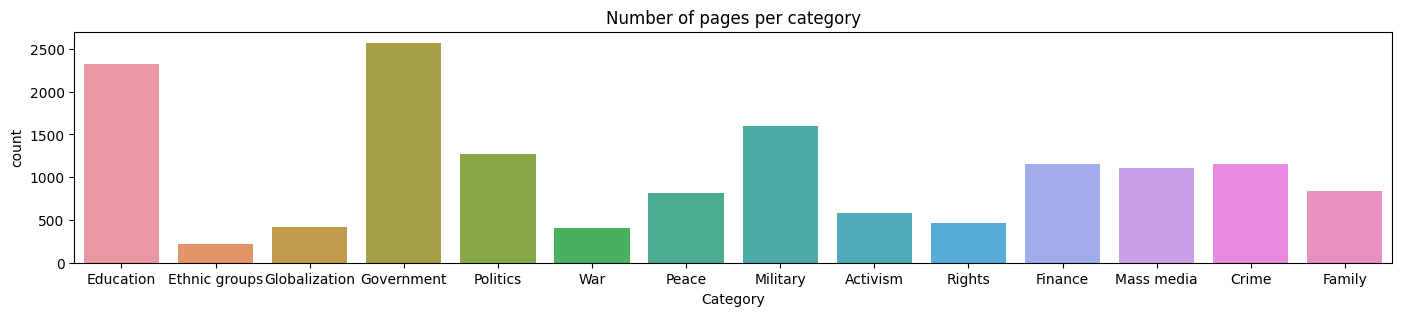

In [14]:
# Plotting number of pages in each category

plt.figure(figsize=(17,3))
sns.countplot(x=df['Category'],data=df)
plt.title('Number of pages per category')

Text(0.5, 1.0, 'Distribution of Sentiment score')

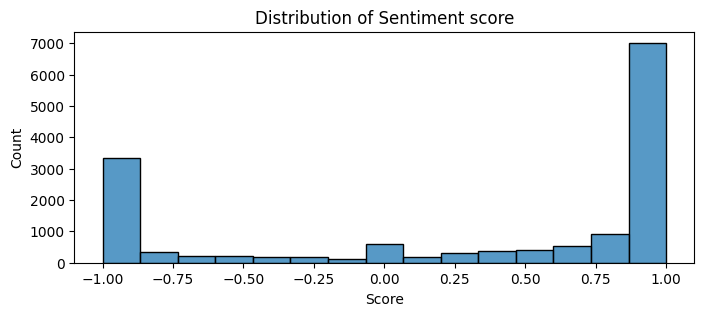

In [15]:
# Plotting scores

plt.figure(figsize=(8,3))
sns.histplot(x=df['Score'],data=df)
plt.title('Distribution of Sentiment score')

In [16]:
# Scores per category

scores = df.groupby(['Category']).mean().sort_values(by='Score',ascending=False)

scores = scores.reset_index()

scores


,Category,Score
0,Education,0.653109
1,Mass media,0.563700
2,Finance,0.542651
3,Globalization,0.495288
4,Government,0.479091
5,Peace,0.423466
6,Politics,0.418851
7,Activism,0.393143
8,Ethnic groups,0.248750
9,Family,0.246284


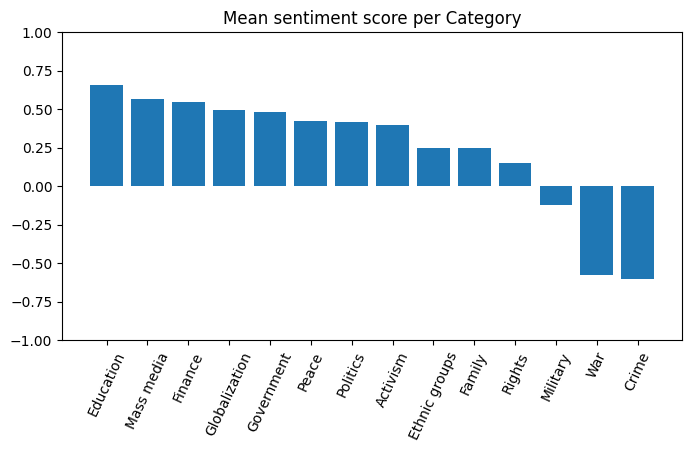

In [37]:
plt.figure(figsize=(8,4))
plt.bar(scores['Category'],scores['Score'])
plt.title('Mean sentiment score per Category')
plt.ylim(-1,1)
plt.xticks(rotation=65)
plt.show()

## Sentiment binning and comparison with Categories

In [18]:
# 14 intervals (quantiles)

list(pd.qcut(df['Score'], q=14).unique())

[Interval(0.964, 0.985, closed='right'),
 Interval(-0.985, -0.896, closed='right'),
 Interval(0.985, 0.994, closed='right'),
 Interval(0.994, 0.998, closed='right'),
 Interval(0.586, 0.813, closed='right'),
 Interval(0.999, 1.0, closed='right'),
 Interval(0.998, 0.999, closed='right'),
 Interval(-0.318, 0.17, closed='right'),
 Interval(0.813, 0.917, closed='right'),
 Interval(0.917, 0.964, closed='right'),
 Interval(-0.896, -0.318, closed='right'),
 Interval(0.17, 0.586, closed='right'),
 Interval(-0.999, -0.985, closed='right'),
 Interval(-1.001, -0.999, closed='right')]

In [19]:
# 27 intervals (quantiles)

list(pd.qcut(df['Score'], q=27).unique())

[Interval(0.9828, 0.9892, closed='right'),
 Interval(-0.9524, -0.8689, closed='right'),
 Interval(0.9892, 0.9933, closed='right'),
 Interval(0.996, 0.9976, closed='right'),
 Interval(0.6383, 0.7717, closed='right'),
 Interval(0.9729, 0.9828, closed='right'),
 Interval(0.9994, 0.9998, closed='right'),
 Interval(0.9998, 1.0, closed='right'),
 Interval(0.9976, 0.9987, closed='right'),
 Interval(-0.2023, 0.0, closed='right'),
 Interval(0.9933, 0.996, closed='right'),
 Interval(0.7717, 0.85, closed='right'),
 Interval(0.9022, 0.9349, closed='right'),
 Interval(0.9987, 0.9994, closed='right'),
 Interval(0.9349, 0.9582, closed='right'),
 Interval(0.9582, 0.9729, closed='right'),
 Interval(0.85, 0.9022, closed='right'),
 Interval(0.4767, 0.6383, closed='right'),
 Interval(-0.8689, -0.6124, closed='right'),
 Interval(-0.9945, -0.9833, closed='right'),
 Interval(0.2732, 0.4767, closed='right'),
 Interval(-0.9985, -0.9945, closed='right'),
 Interval(-0.6124, -0.2023, closed='right'),
 Interval(-0

In [20]:
# Adding binning (14 an 27bins) to dataframe

df['Score_14bins'] = pd.qcut(df['Score'], q=14, labels=[e for e in range(1,15)])

df['Score_27bins'] = pd.qcut(df['Score'], q=27, labels=[e for e in range(1,28)])

In [21]:
df.head()

,Page,Category,Links,Text,Score,Score_14bins,Score_27bins
0,Field trip,Education,[American Association of School Administrators...,['A field trip or excursion is a journey by a ...,0.9837,10,20
1,Education in emergencies and conflict areas,Education,"[Adult, Armed conflict, Asylum seeker, Banglad...","[""Education in emergencies and conflict areas ...",-0.9356,3,6
2,Ability grouping,Education,"[Academic achievement, Classroom, Cluster grou...",['Ability grouping is the educational practice...,0.9931,11,21
3,Classwide Peer Tutoring,Education,"[ADHD, Active learning, Cardio-pulmonary resus...",['Classwide Peer Tutoring (CWPT) is a variatio...,0.9960,12,23
4,Flexible learning,Education,"[Australia, Blended learning, Distance educati...",['Flexible learning is a principle of practice...,0.7579,7,13


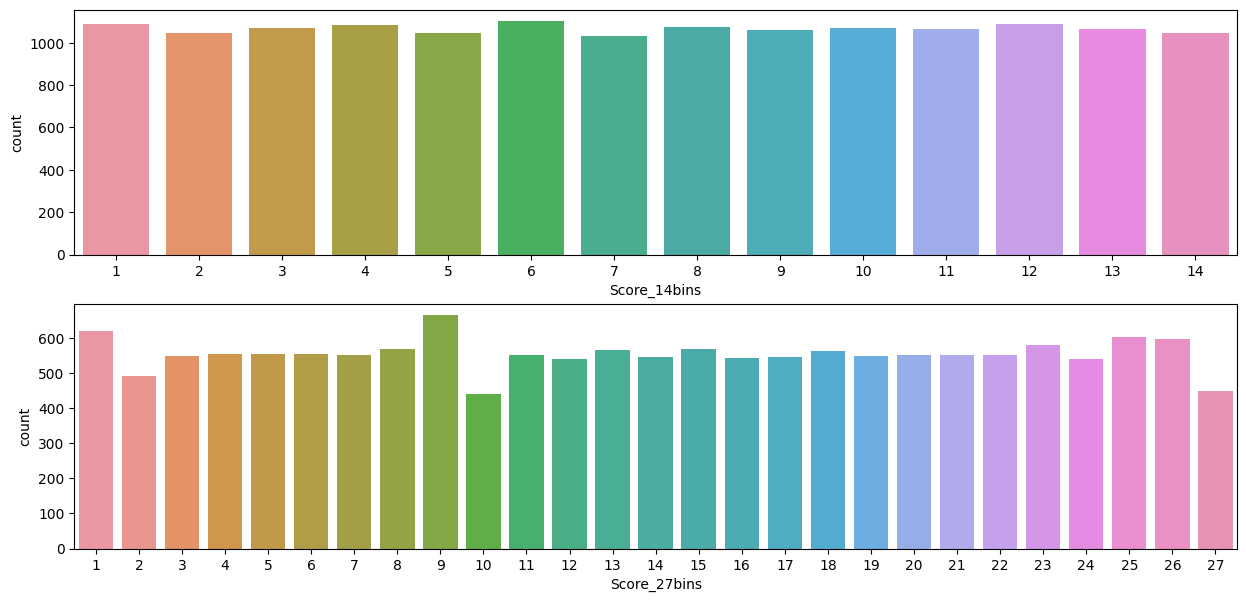

In [22]:
plt.figure(figsize=(15,7))

plt.subplot(2,1,1)
sns.countplot(x=df['Score_14bins'],data=df)

plt.subplot(2,1,2)
sns.countplot(x=df['Score_27bins'],data=df)

plt.show()

In [23]:
pages = df['Page'].to_list()

len(pages)

14928

In [24]:
# Removing categories and links to pages not in 'Page'

links_clean = [] # list of lists (rows)

for index,row in df.iterrows():
    links_per_page = []
    for e in row['Links']: 
        if e in pages:  # if the page is in the column 'Page'
            links_per_page.append(e)  # then keep it
    links_clean.append(links_per_page)

df['Links'] = links_clean

In [25]:
links_clean

[['Curriculum',
  'Experiential learning',
  'Government agency',
  'Lecture',
  'Middle school',
  'Student',
  'Teacher',
  'Zoo'],
 ['Asylum seeker',
  'Child',
  'Children in the military',
  'Curriculum',
  'Human rights',
  'International human rights law',
  'International law',
  'Internet',
  'Learning',
  'Non-governmental organization',
  'Open educational resources',
  'Parent',
  'Peacebuilding',
  'Refugee',
  'Refugee children',
  'Right to education',
  'Secondary school',
  'Student',
  'Teacher'],
 ['Academic achievement',
  'Gifted education',
  'Lesson',
  'Student',
  'Tracking (education)'],
 ['Active learning',
  'Curriculum',
  'Peer-mediated instruction',
  'United States Department of Education',
  'What Works Clearinghouse'],
 ['Blended learning', 'M-learning', 'Networked learning'],
 ['ERIC'],
 [],
 ['Computer-supported collaborative learning',
  'Cooperative learning',
  'Educational technology',
  'Learning',
  'Learning by teaching',
  'Learning theory (e

In [26]:
# Apparently recreating the graph is easier than adding attributes to the nodes

DG = nx.DiGraph()


# Adding nodes
for index,row in df.iterrows():
    # Adding node and attributes
    DG.add_node(row['Page'], category=row['Category'], 
                score=row['Score'], score14=row['Score_14bins'], score27=row['Score_27bins'])


# Creating edges
col_from = [] # Link from page...
col_to = []   # ...to page.

for index, row in df.iterrows(): # iterating over rows
    for e in row['Links']:
        col_from.append(row['Page'])
        col_to.append(e)

df_network = pd.DataFrame()
df_network['from'] = col_from
df_network['to'] = col_to


# Adding edges
for index, row in df_network.iterrows():
    DG.add_edge(row['from'],row['to'])

In [27]:
DG.nodes['Field trip']

{'category': 'Education', 'score': 0.9837, 'score14': 10, 'score27': 20}

In [28]:
# Undirected graph for louvain

G = nx.to_undirected(DG)

In [29]:
# Creating list of communities

comms_14bins = []
comms_27bins = []

for val in range(1,15):
    bin = [node for node,att in DG.nodes(data=True) if att['score14']==val]
    comms_14bins.append(bin)

for val in range(1,28):
    bin = [node for node,att in G.nodes(data=True) if att['score27']==val]
    comms_27bins.append(bin)

In [30]:
print(len(comms_14bins))
print(len(comms_27bins))

len(comms_14bins[0])

14
27


1087

In [31]:
# Creating NodeClustering objects

comms_14bins = NodeClustering(communities=comms_14bins,graph=DG)

In [32]:
# Creating NodeClustering objects

comms_27bins = NodeClustering(communities=comms_27bins,graph=G)

In [33]:
# Dividing graph into categories

education = [node for node,att in DG.nodes(data=True) if att['category']== 'Education']
ethnic = [node for node,att in DG.nodes(data=True) if att['category']== 'Ethnic groups']
globa = [node for node,att in DG.nodes(data=True) if att['category']== 'Globalization']
gov = [node for node,att in DG.nodes(data=True) if att['category']== 'Government']
politics = [node for node,att in DG.nodes(data=True) if att['category']== 'Politics']
war = [node for node,att in DG.nodes(data=True) if att['category']== 'War']
peace = [node for node,att in DG.nodes(data=True) if att['category']== 'Peace']
mil = [node for node,att in DG.nodes(data=True) if att['category']== 'Military']
act = [node for node,att in DG.nodes(data=True) if att['category']== 'Activism']
rights = [node for node,att in DG.nodes(data=True) if att['category']== 'Rights']
fin = [node for node,att in DG.nodes(data=True) if att['category']== 'Finance']
mm = [node for node,att in DG.nodes(data=True) if att['category']== 'Mass media']
crime = [node for node,att in DG.nodes(data=True) if att['category']== 'Crime']
fam = [node for node,att in DG.nodes(data=True) if att['category']== 'Family']

data = [education,ethnic,globa,gov,politics,war,peace,mil,act,rights,fin,mm,crime,fam]

len(data)


# Creating NodeClustering object
ground_truth = NodeClustering(communities=data,graph=DG)
ground_truth_G = NodeClustering(communities=data,graph=G)

In [34]:
# NMI categories

comms_14bins.normalized_mutual_information(ground_truth)[0]

0.05626866341705789

In [35]:
# Louvain

louvain = algorithms.louvain(G)

In [36]:
# NMI categories

comms_27bins.normalized_mutual_information(ground_truth_G)[0]

0.05279722243042679